In [192]:
import pandas as pd
import matplotlib.pyplot as plt

In [193]:
df = pd.read_csv(r"Placement_Data_Full_Class.csv", index_col=0)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [194]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [195]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


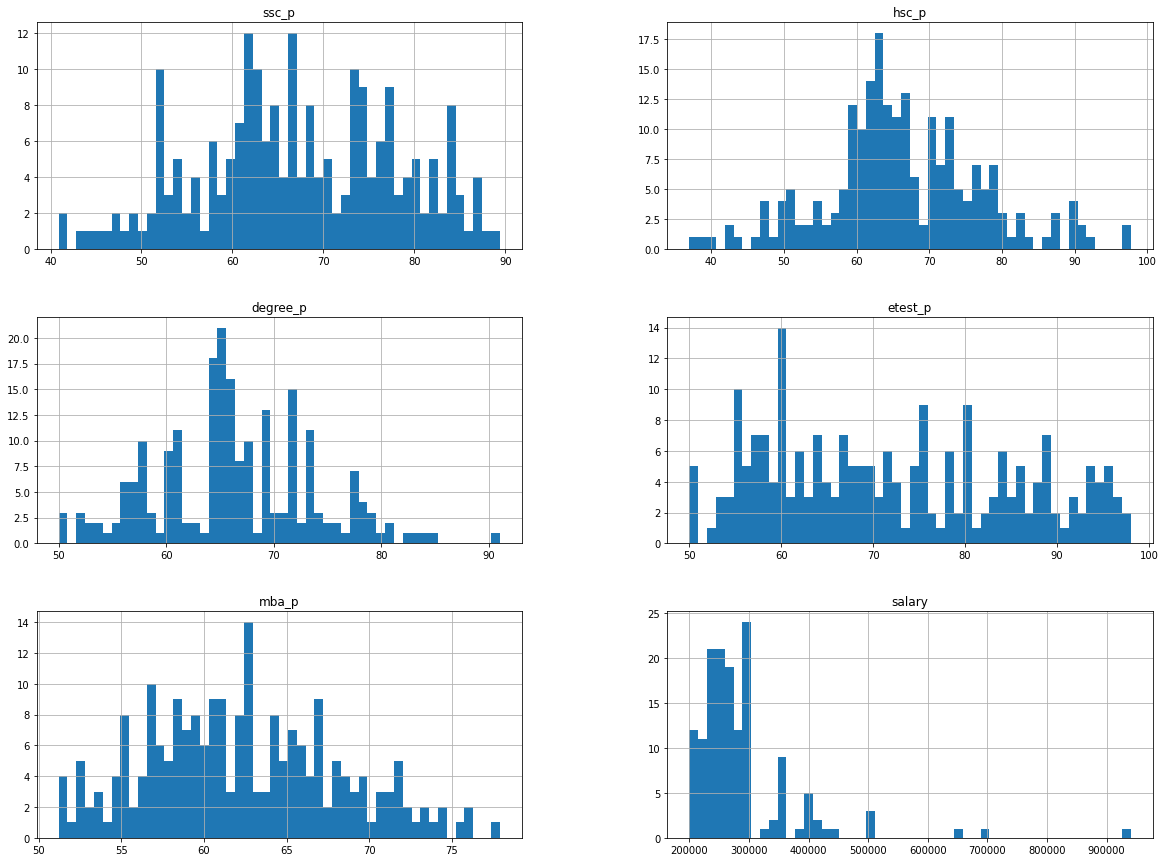

In [197]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [198]:
pd.crosstab(index = df['specialisation'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
specialisation,,,
Mkt&Fin,0.116279,0.441860,0.55814
Mkt&HR,0.195349,0.246512,0.44186
All,0.311628,0.688372,1.00000


In [199]:
pd.crosstab(index = df['specialisation'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
specialisation,,,
Mkt&Fin,0.489362,0.689189,0.55814
Mkt&HR,0.510638,0.310811,0.44186


In [200]:
pd.crosstab(index = df['status'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
status,,,
Not Placed,0.404255,0.135135,0.311628
Placed,0.595745,0.864865,0.688372


In [201]:
pd.crosstab(index = df['degree_t'], columns=df['status'], margins =True, normalize =True)

status,Not Placed,Placed,All
degree_t,,,
Comm&Mgmt,0.200000,0.474419,0.674419
Others,0.027907,0.023256,0.051163
Sci&Tech,0.083721,0.190698,0.274419
All,0.311628,0.688372,1.000000


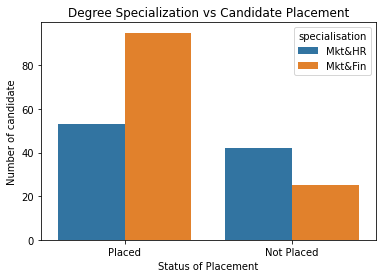

In [202]:
sns.countplot(x="status", data=df, hue='specialisation')
plt.title("Degree Specialization vs Candidate Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

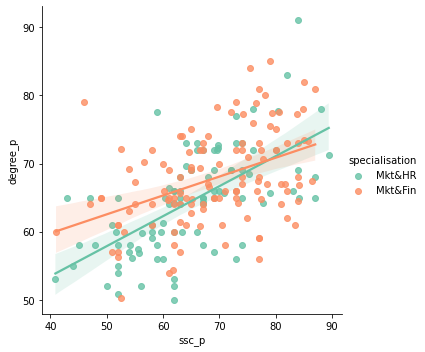

In [203]:
sns.lmplot(x='ssc_p', y='degree_p', data= df, hue ='specialisation', legend=True, palette="Set2")
plt.show()

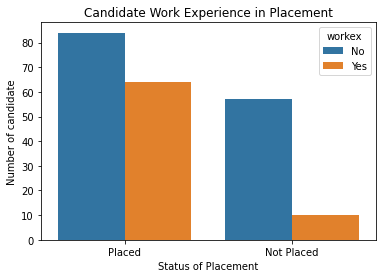

In [204]:
sns.countplot(x="status", data=df, hue='workex')
plt.title("Candidate Work Experience in Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

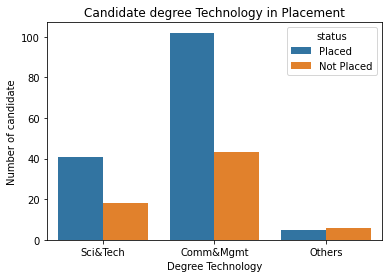

In [205]:
sns.countplot(x="degree_t", data=df, hue='status')
plt.title("Candidate degree Technology in Placement")
plt.xlabel("Degree Technology")
plt.ylabel("Number of candidate")
plt.show()

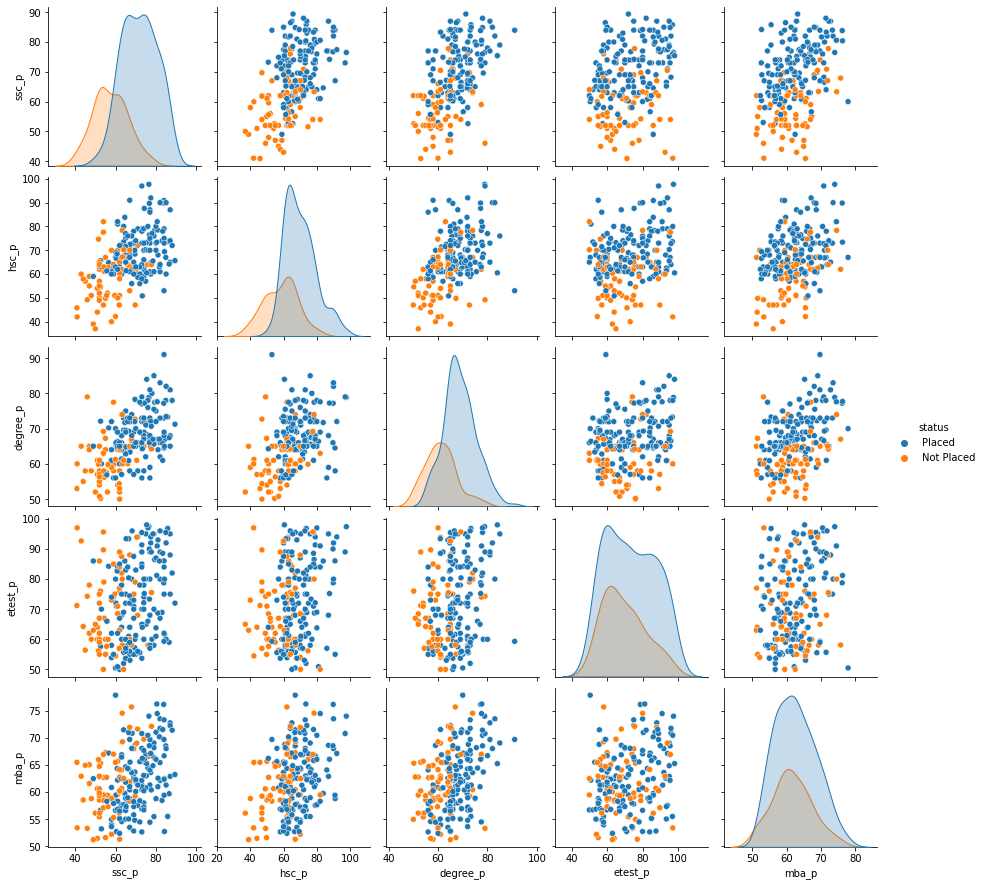

In [206]:
sns.pairplot(df.drop(["salary"], axis=1), kind="scatter", hue="status")
plt.show()

In [207]:
df.groupby(["status"]).mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [208]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [209]:
df_placed = df.dropna(how="any")
df_placed.shape

(148, 14)

In [210]:
numeric_data = df_placed.select_dtypes(exclude = [object])
numeric_data.shape

(148, 6)

c:\Users\sahni\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sahni\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


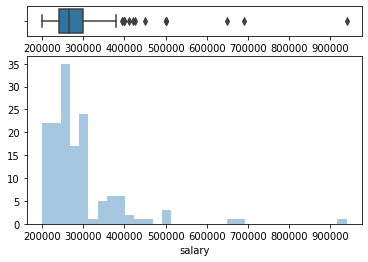

In [211]:
f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df_placed["salary"], ax=ax_box)

sns.distplot(df_placed["salary"], ax=ax_hist, kde=False)
plt.show()

In [212]:
corr_matrix = numeric_data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


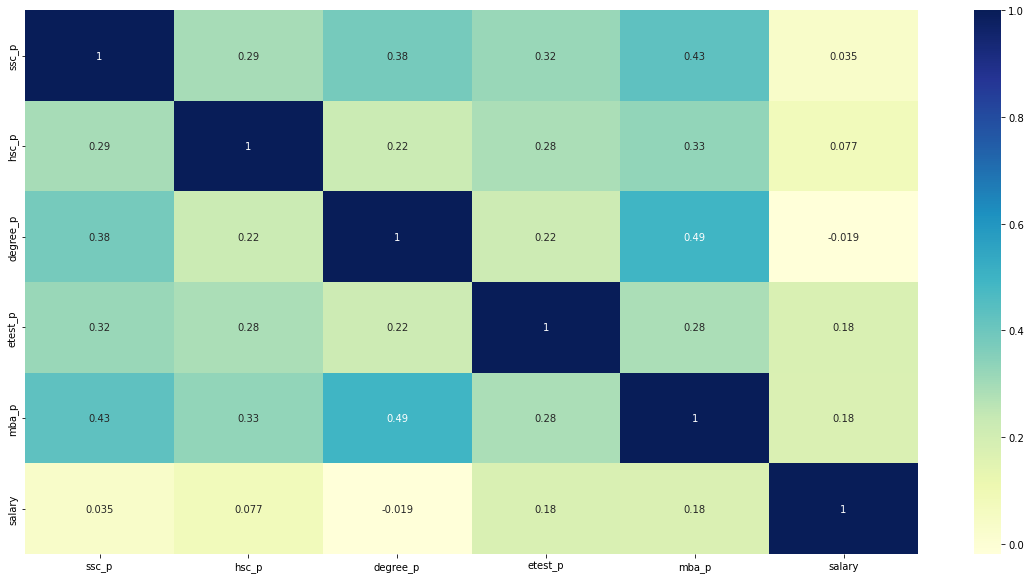

In [213]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

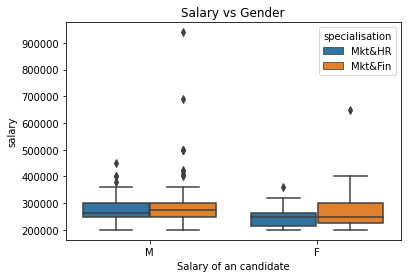

In [214]:
sns.boxplot(x=df_placed['gender'], y = df_placed['salary'], hue='specialisation', data=df_placed)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

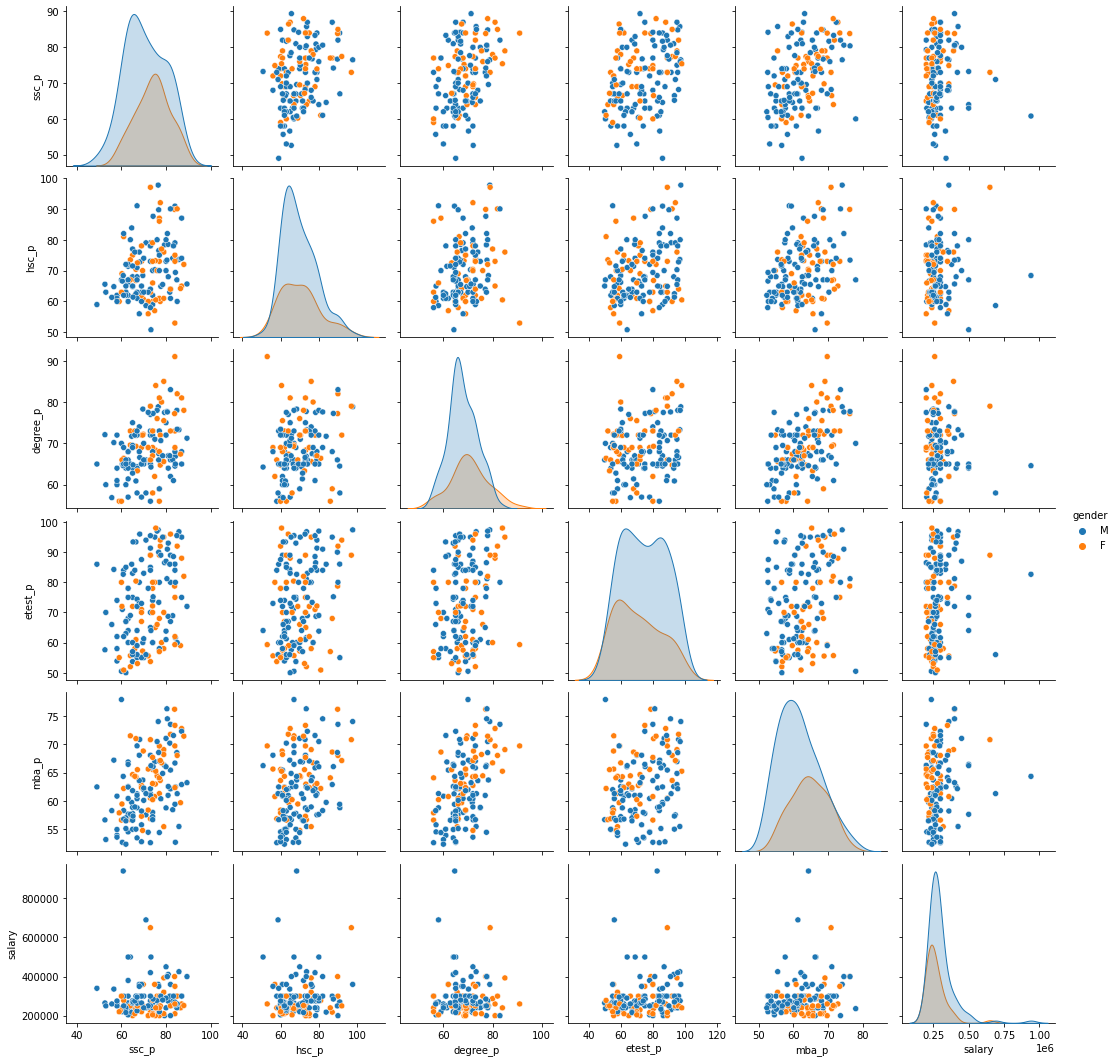

In [215]:
sns.pairplot(df_placed, kind="scatter", hue="gender")
plt.show()

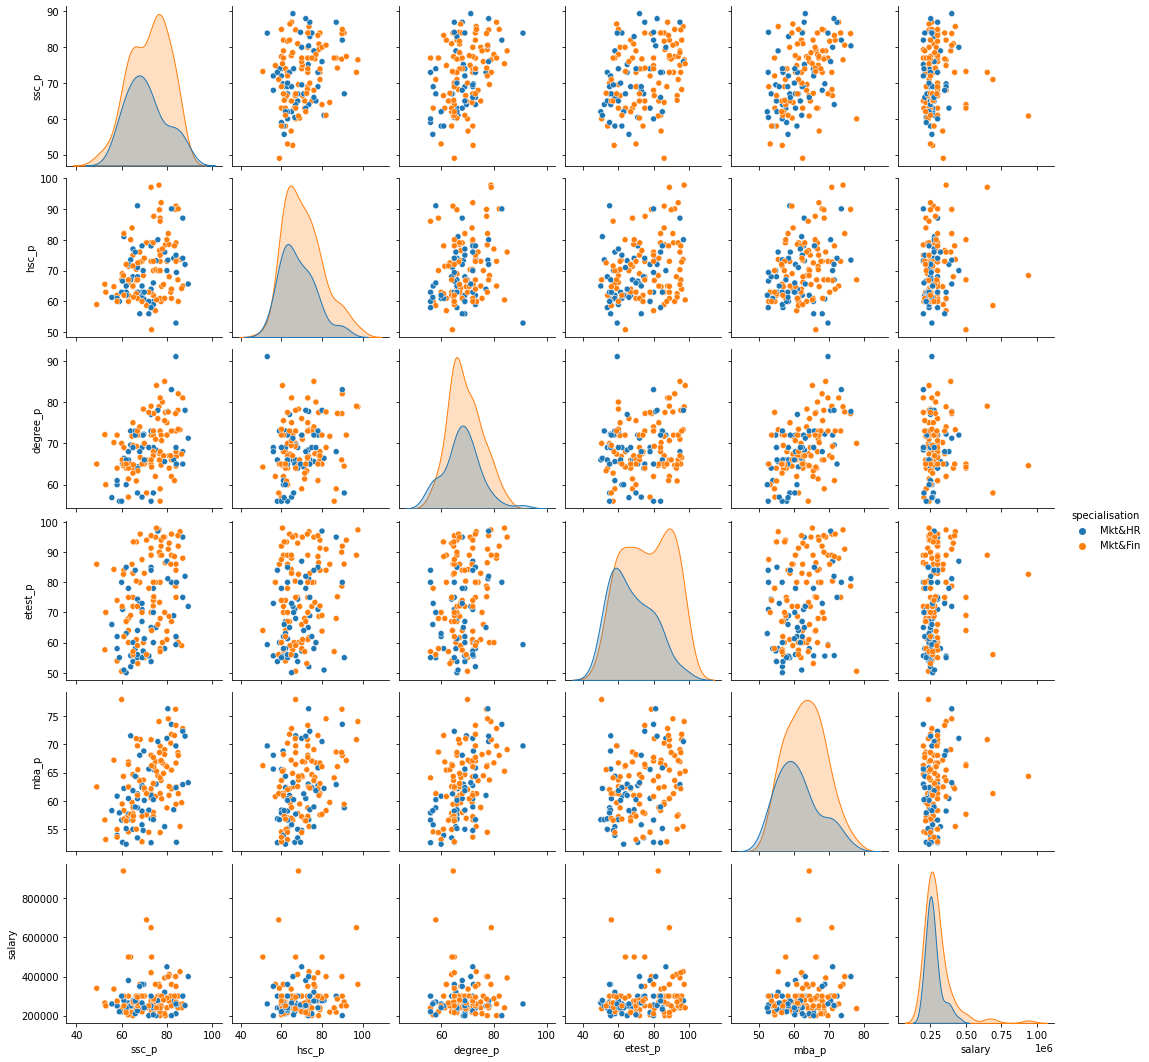

In [216]:
sns.pairplot(df_placed, kind="scatter", hue="specialisation")
plt.show()